Starting best score, % target:  66.66666666666666
End best score, % target:  100.0


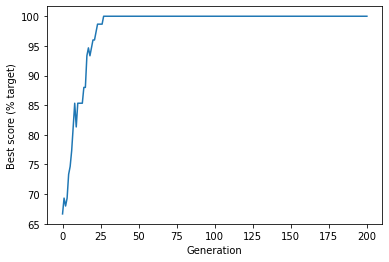

In [7]:
import random
import numpy as np

def create_reference_solution(chromosome_length):

    number_of_ones = int(chromosome_length / 2)
    reference = np.zeros(chromosome_length)
    reference[0: number_of_ones] = 1
    np.random.shuffle(reference)
    
    return reference


def create_starting_population(individuals, chromosome_length):
    population = np.zeros((individuals, chromosome_length))
    for i in range(individuals):
        ones = random.randint(0, chromosome_length)
        population[i, 0:ones] = 1
        np.random.shuffle(population[i])
    
    return population


def calculate_fitness(reference, population):
    identical_to_reference = population == reference
    fitness_scores = identical_to_reference.sum(axis=1)
    
    return fitness_scores


def select_individual_by_tournament(population, scores):
    population_size = len(scores)
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    return population[winner, :]

def breed_by_crossover(parent_1, parent_2):
    chromosome_length = len(parent_1)
    crossover_point = random.randint(1,chromosome_length-1)
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    return child_1, child_2
    

def randomly_mutate_population(population, mutation_probability):
    
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        return population
    
chromosome_length = 75
population_size = 500
maximum_generation = 200
best_score_progress = [] 

reference = create_reference_solution(chromosome_length)
population = create_starting_population(population_size, chromosome_length)
scores = calculate_fitness(reference, population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

best_score_progress.append(best_score)
for generation in range(maximum_generation):
    new_population = []
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    population = np.array(new_population)
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)
    
print ('End best score, % target: ', best_score)
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()